Japan Birth Data-Analysis 1899-2023 , almost 124 years.

In [77]:
import pandas as pd
df=pd.read_csv("japan_birth_statistics_1899_2023.csv")
df.head()

,year,total_births,male_births,female_births,crude_birth_rate,sex_ratio_at_birth,total_fertility_rate
0,2023,727288,372603,354685,6.0,105.1,1.20
1,2022,770759,395257,375502,6.3,105.3,1.26
2,2021,811622,415903,395719,6.6,105.1,1.30
3,2020,840835,430713,410122,6.8,105.0,1.33
4,2019,865239,443430,421809,7.0,105.1,1.36


In [78]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  122 non-null    int64  
 1   total_births          122 non-null    int64  
 2   male_births           122 non-null    int64  
 3   female_births         122 non-null    int64  
 4   crude_birth_rate      122 non-null    float64
 5   sex_ratio_at_birth    122 non-null    float64
 6   total_fertility_rate  77 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 6.8 KB


,year,total_births,male_births,female_births,crude_birth_rate,sex_ratio_at_birth,total_fertility_rate
count,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000,77.000000
mean,1961.393443,1.619319e+06,8.304865e+05,7.888323e+05,20.824590,105.310656,1.860779
std,36.585812,4.392864e+05,2.249261e+05,2.144170e+05,10.534323,0.858387,0.696069
min,1899.000000,7.272880e+05,3.726030e+05,3.546850e+05,6.000000,102.700000,1.200000
25%,1929.250000,1.212138e+06,6.233448e+05,5.887932e+05,9.825000,104.900000,1.390000
50%,1962.500000,1.656495e+06,8.494710e+05,8.058480e+05,18.600000,105.300000,1.720000
75%,1992.750000,1.985486e+06,1.014098e+06,9.673500e+05,32.375000,105.800000,2.050000
max,2023.000000,2.696638e+06,1.380008e+06,1.316630e+06,36.200000,108.700000,4.540000


In [79]:
print("Null valueCount below:")
df.isnull().sum()

Null valueCount below:


year                     0
total_births             0
male_births              0
female_births            0
crude_birth_rate         0
sex_ratio_at_birth       0
total_fertility_rate    45
dtype: int64

Data cleaning: 
45 rows out of 122 in total_fertility_rate are null, replacing with mean value between upper and lower value of null rows.

In [80]:
df['total_fertility_rate'] = df['total_fertility_rate'].fillna(
    (df['total_fertility_rate'].shift(1) + 
     df['total_fertility_rate'].shift(-1)) / 2
)
print("Data cleaned successfully")
df.isnull().sum()

Data cleaned successfully


year                     0
total_births             0
male_births              0
female_births            0
crude_birth_rate         0
sex_ratio_at_birth       0
total_fertility_rate    45
dtype: int64

Data Analysis

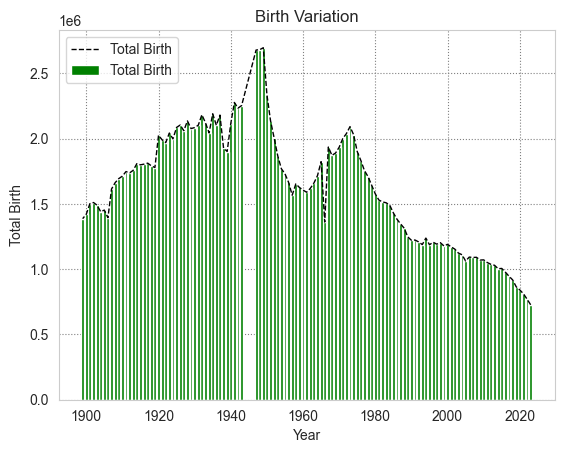

In [81]:
import matplotlib.pyplot as plt
plt.bar(df['year'],df['total_births'] , color="green" ,label="Total Birth")
plt.plot(df['year'],df['total_births'] , color="black" ,linestyle="--",linewidth="1",label="Total Birth")
plt.legend(loc='upper left',fontsize=10)
plt.title('Birth Variation')
plt.xlabel("Year")
plt.ylabel("Total Birth")
plt.grid(color='grey',linestyle=':')
plt.show()

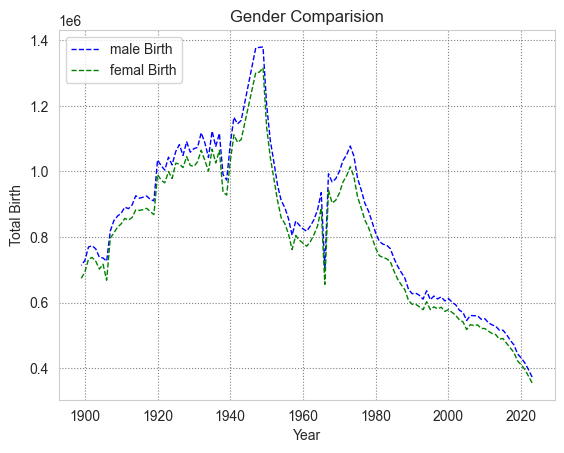

In [82]:
plt.plot(df['year'] ,df['male_births'], color="blue" ,linestyle="--",linewidth="1",label="male Birth")
plt.plot(df['year'] ,df['female_births'], color="green" ,linestyle="--",linewidth="1",label="femal Birth")
plt.legend(loc='upper left',fontsize=10)
plt.title('Gender Comparision')
plt.xlabel("Year")
plt.ylabel("Total Birth")
plt.grid(color='grey',linestyle=':')
plt.show()

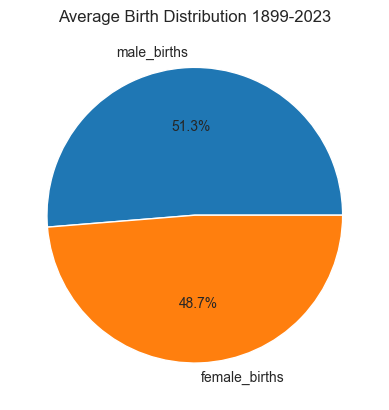

In [83]:
totals = df[['male_births','female_births']].sum()
totals.plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.ylabel('')
plt.title("Average Birth Distribution 1899-2023")
plt.show()


In [84]:
print('Year when male birth was at peak: ',df[df['male_births'] == df['male_births'].max()]['year'].values[0])
print('Year when female birth was at peak: ',df[df['female_births'] == df['female_births'].max()]['year'].values[0])

Year when male birth was at peak:  1949
Year when female birth was at peak:  1949


Fertility Rate Trend

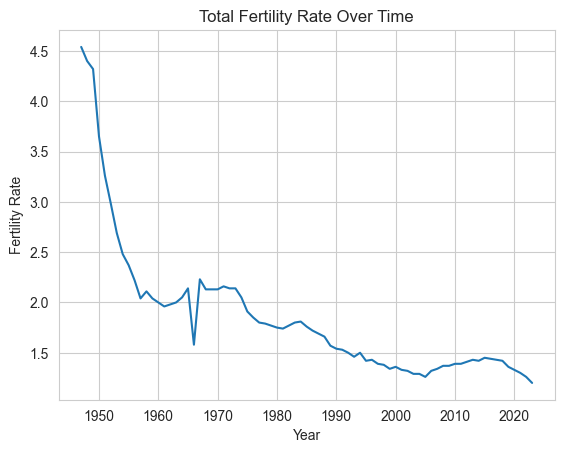

In [85]:
plt.figure()
plt.plot(df['year'], df['total_fertility_rate'])
plt.title("Total Fertility Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.grid(True)
plt.show()

Crude Birth Rate vs Fertility Rate (Comparison)

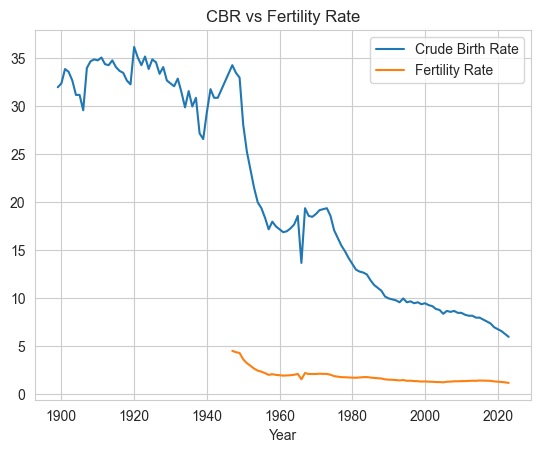

In [86]:
plt.figure()
plt.plot(df['year'], df['crude_birth_rate'], label="Crude Birth Rate")
plt.plot(df['year'], df['total_fertility_rate'], label="Fertility Rate")

plt.legend()
plt.title("CBR vs Fertility Rate")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Growth Rate Analysis

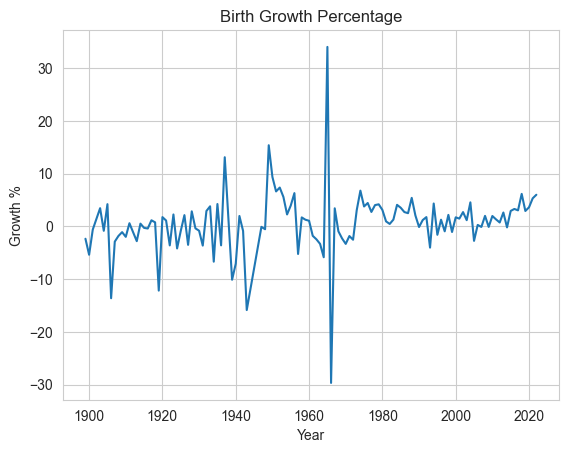

Year for Maximum birth_growth:  1965
Year for Minimum birth_growth:  1966


In [87]:
df['birth_growth_%'] = df['total_births'].pct_change() * 100

plt.figure()
plt.plot(df['year'], df['birth_growth_%'])
plt.title("Birth Growth Percentage")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.grid(True)
plt.show()
print('Year for Maximum birth_growth: ',df[df['birth_growth_%']==df['birth_growth_%'].max()]['year'].values[0])
print('Year for Minimum birth_growth: ',df[df['birth_growth_%']==df['birth_growth_%'].min()]['year'].values[0])

Correlation Heatmap

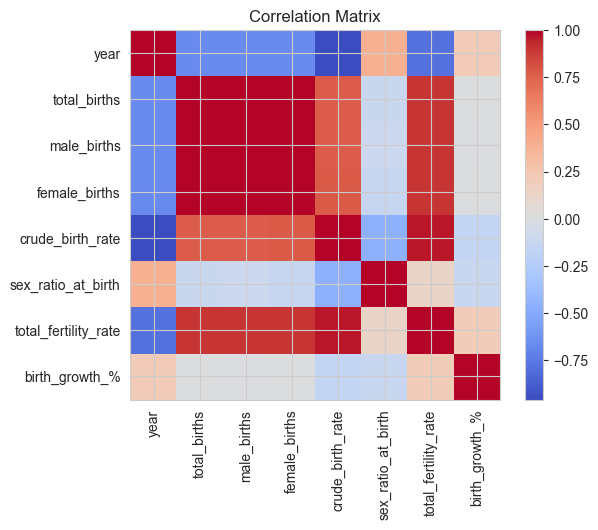

In [88]:
plt.figure()
plt.imshow(df.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Correlation Matrix")
plt.show()

Male–Female Gap Analysis

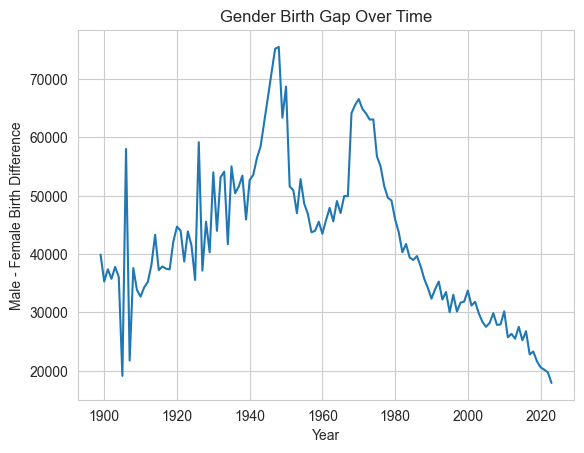

Year for highest birth_gap:  1948
Year for lowest birth_gap:  2023


In [89]:
df['gender_gap'] = df['male_births'] - df['female_births']

plt.figure()
plt.plot(df['year'], df['gender_gap'])
plt.title("Gender Birth Gap Over Time")
plt.xlabel("Year")
plt.ylabel("Male - Female Birth Difference")
plt.grid(True)
plt.show()
print('Year for highest birth_gap: ',df[df['gender_gap']==df['gender_gap'].max()]['year'].values[0])
print('Year for lowest birth_gap: ',df[df['gender_gap']==df['gender_gap'].min()]['year'].values[0])